In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [2]:
np.random.seed(45)
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=3,hypercube=False,class_sep=10)

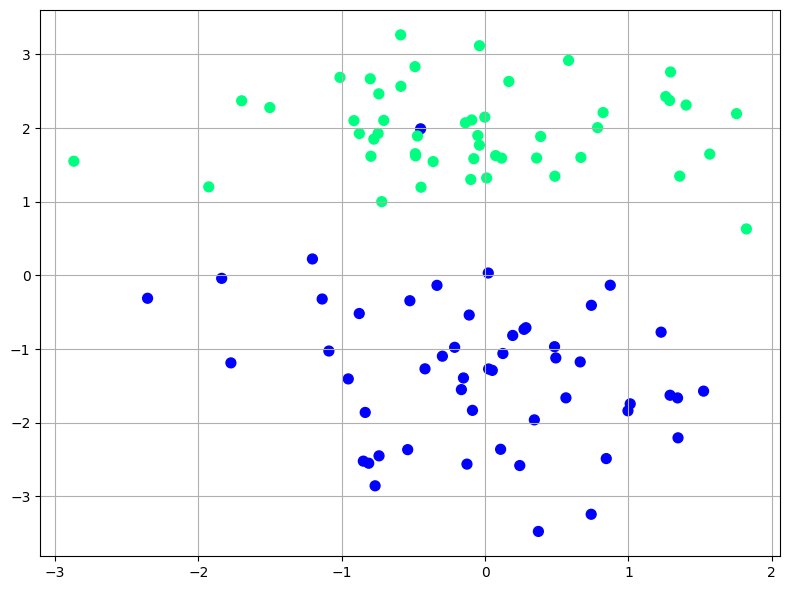

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(x=X[:,0],y=X[:,1],cmap='winter',c=y,s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
def perceptron(X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    rate = .1
    weights = np.ones(X_train.shape[1])
    for i in range(1000):
        student = np.random.randint(0,X_train.shape[0])
        y_hat = step(np.dot(weights,X_train[student]))
        weights = weights + rate*(y_train[student] - y_hat)*X_train[student]
    return weights[0],weights[1:]

def step(val):
    return 1 if val>=0 else 0

In [5]:
intercept,coef = perceptron(X,y)
m_per = -(coef[0]/coef[1])
b_per = -(intercept/coef[1])
m_per,b_per

(np.float64(-0.4359106613482295), np.float64(0.8935309968777877))

In [6]:
x_input = np.linspace(-3,3,100)
y_per = m_per*x_input + b_per

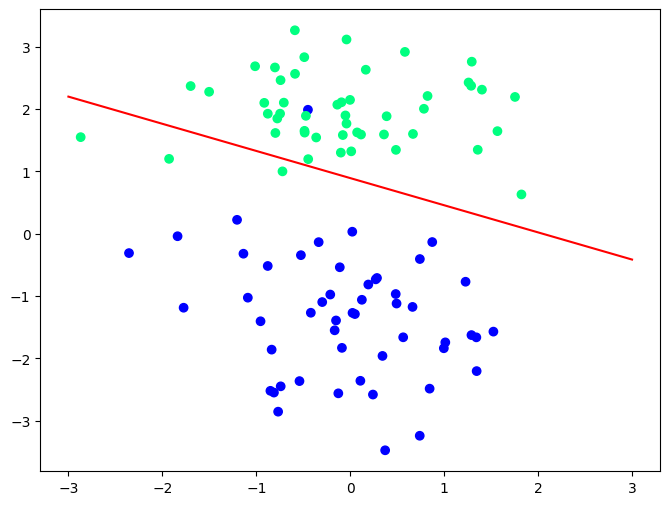

In [7]:
plt.figure(figsize=(8,6))
plt.plot(x_input,y_per,c='r')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.show()

In [8]:
lor = LogisticRegression()
lor.fit(X,y)
lor.coef_,lor.intercept_

(array([[0.29177184, 2.51034039]]), array([-1.34193566]))

In [9]:

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(-lor.intercept_/lor.coef_[0][1])
y_lor = m*x_input + b

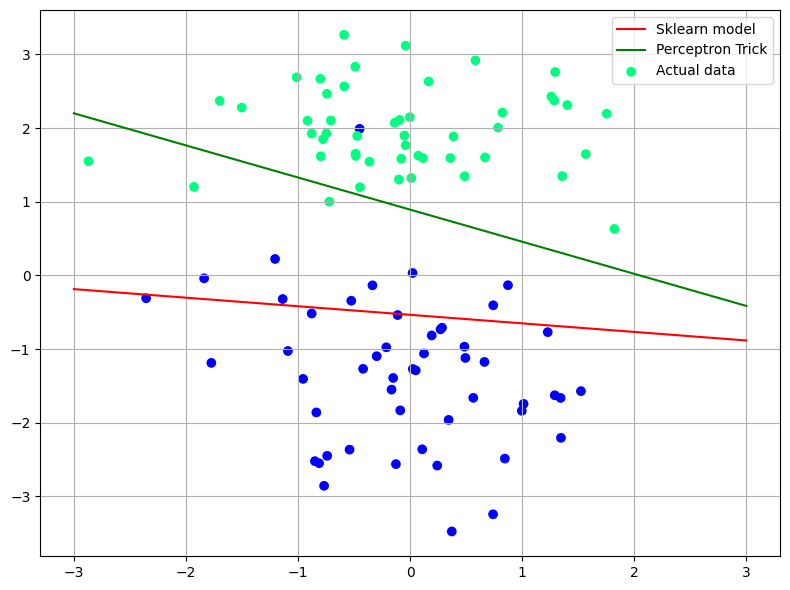

In [10]:
plt.figure(figsize=(8,6))
plt.plot(x_input,y_lor,c='r',label='Sklearn model')
plt.plot(x_input,y_per,c='g',label='Perceptron Trick')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',label='Actual data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [11]:
def perceptron(X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)
    rate = .1
    weights = np.ones(X_train.shape[1])
    for i in range(1000):
        student = np.random.randint(0,X_train.shape[0])
        y_hat = sigmoid(np.dot(weights,X_train[student]))
        weights = weights + rate*(y_train[student] - y_hat)*X_train[student]
    return weights[0],weights[1:]


def sigmoid(val):
    return  1/(1+np.exp(-val))

In [12]:
coef,intercept = perceptron(X,y)
coef,intercept

(np.float64(-1.403433516287803), array([0.4164606 , 3.48831067]))

In [13]:
intercept,coef = perceptron(X,y)
m_sig = -(coef[0]/coef[1])
b_sig = -(intercept/coef[1])
m_sig,b_sig

(np.float64(-0.16908577419158843), np.float64(0.4807160028415566))

In [14]:
y_sig = m_sig*x_input + b_sig

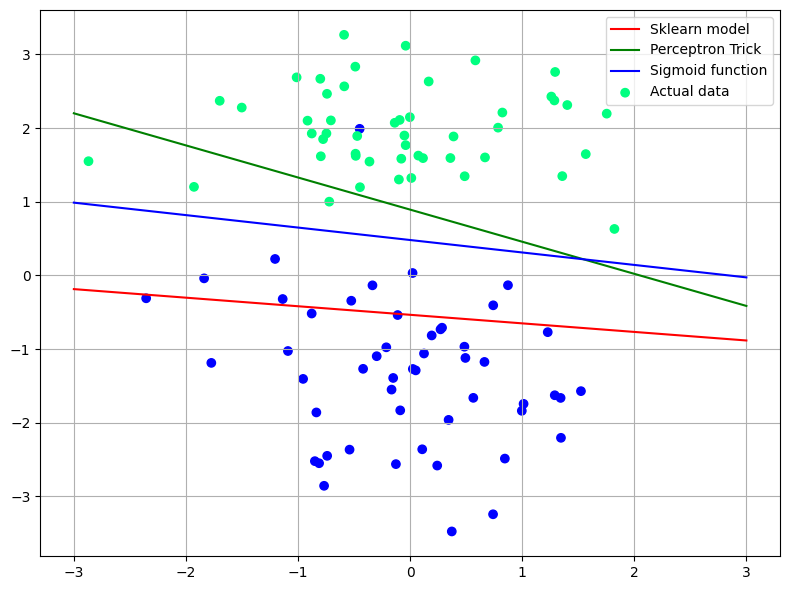

In [15]:
plt.figure(figsize=(8,6))
plt.plot(x_input,y_lor,c='r',label='Sklearn model')
plt.plot(x_input,y_per,c='g',label='Perceptron Trick')
plt.plot(x_input,y_sig,c='b',label='Sigmoid function')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',label='Actual data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()